# ML Lab 
# Experiment -1 (Linear Regression)


Divyansh Agarwal

AIML B3

500076414

R177219079


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%notebook inline

In [21]:
df = pd.read_csv("salary_data.csv")

In [22]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [23]:
#checking for null values

print("Checking for null values in all columns...\n")
count =0
for i in df.columns:
    if(i == np.where(pd.isnull(i))):
        count+=1
if (count>0):
    print(str(count) + "columns contain null values")
else:
    print("No column contains null values")

Checking for null values in all columns...

No column contains null values


In [24]:
def calcMean(X):
    
    sum = 0
    count = 0
    
    for i in X:
        sum += i
        count += 1
    
    mean = sum/count
    
    return mean

In [25]:
def calcError(Y,y):
    
    mse = sum(((Y-y)**2) / Y.shape[0])
    rmse = mse ** (1/2)
    mae = Y-y
    
    for i in range(len(mae)):
        if (mae[i] < 0):
            mae[i] = -mae[i]
    mae = sum(mae) / Y.shape[0]
    
    print("Mean Absolute Error: ", mae)
    print("------------------------------")
    print("Mean Squared Error: ", mse)
    print("------------------------------")
    print("Root Mean Squared Error: ", rmse)
    

In [26]:
def makePred(m,c):
    
    x = float(input("\nEnter the Years of Exprerience: "))
    y = (m * x) + c
    
    print("------------------------------")
    print("Expected salary: ", y)
    print("------------------------------")
    
    return(x,y)

In [27]:
def updateValues(X, Y, m, c, exp, sal):
    
    X = np.append(X, exp,)
    Y = np.append(Y, sal)
    
    y = (m * X) + c
    
    return(X,Y,y)

In [28]:
def regPlot(X,Y,y):
        
        fig, ax = plt.subplots(figsize=(9,7))
        
        #data points
        ax.scatter(X,Y, color = "black")
        
        # regression line
        ax.plot(X,y, color = "orange")
        
        #setting title
        plt.title("Simple Linear Regression", fontsize = 20)
        
        #setting label
        plt.xlabel("Years of Experience", fontsize = 15)
        plt.ylabel("Salary", fontsize = 15)
        
        fig.tight_layout() # ensures everything is displayed fine

In [31]:
def linerRegression(df):
    print("Running a Linear Regression on the dataset in 3 2 1..\n")
    X = df["YearsExperience"].values # array containing years of exp.
    Y = df["Salary"].values # array containing sal
    
    mean_X = calcMean(X) # using custom calcMean() function to calculate the mean for both arrays
    mean_Y = calcMean(Y)
    
    # slope calculations
    n = len(X) 
    numerator = 0 
    denominator = 0
    
    for i in range(n): # for loop to traverse through array and get the values of num. and den.
        
        numerator += (X[i] - mean_X) * (Y[i] - mean_Y)
        denominator += (X[i] - mean_X)**2
    
    m = numerator/denominator # assigning value to slope (m)
    c = mean_Y - (m * mean_X) # y= mx+c --> c = y-mx (c is the intercept)
    
    y = (m * X) + c # for every data point in array X, getting a subsequent y value 
    
    print("Slope: " + str(m) +  "\n------------------------------" + " \nIntercept: " + str(c))
    print("------------------------------")
    
    calcError(Y,y) # fucntion to calculate the errors
    print("------------------------------")
    
    ch = input("Do you want to make a prediction: (Y/N)? ") # user input
    
    if(ch=="Y"):
        exp, sal = makePred(m,c) # making predcitions through makePred() function
        ch = input("Do you want to generate a regression plot?: (Y/N) ") 
        
        if(ch == "Y"):
            print("------------------------------")
            print("\nAppending your input to the dataset......")
            
            X, Y, y = updateValues(X, Y, m, c, exp, sal) # function to append input values to arrays
            regPlot(X, Y, y) # plotting fucntion
        
        else:
            print("------------------------------")
            print("Okay! Tho the plot looks good, still your choice is what matters.")
        
    else:
        print("Okay!")
        print("------------------------------")
        
        ch = input(("Do you want to generate a regression plot for this dataset?: (Y/N) "))
        
        if(ch=="Y"):
            print("\nGenerating the plot...")
            regPlot(X, Y, y) 
        
        else:
            print("\nFine, see you soon.....")
        
    

Running a Linear Regression on the dataset in 3 2 1..

Slope: 9449.962321455077
------------------------------ 
Intercept: 25792.20019866869
------------------------------
Mean Absolute Error:  4644.201289443538
------------------------------
Mean Squared Error:  31270951.722280968
------------------------------
Root Mean Squared Error:  5592.043608760662
------------------------------
Do you want to make a prediction: (Y/N)? Y

Enter the Years of Exprerience: 4.5
------------------------------
Expected salary:  68317.03064521654
------------------------------
Do you want to generate a regression plot?: (Y/N) Y
------------------------------

Appending your input to the dataset......


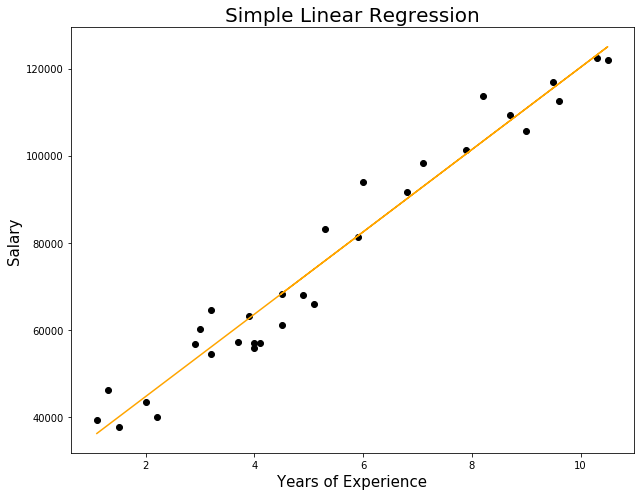

In [32]:
linerRegression(df)

In [34]:
linerRegression(df)

Running a Linear Regression on the dataset in 3 2 1..

Slope: 9449.962321455077
------------------------------ 
Intercept: 25792.20019866869
------------------------------
Mean Absolute Error:  4644.201289443538
------------------------------
Mean Squared Error:  31270951.722280968
------------------------------
Root Mean Squared Error:  5592.043608760662
------------------------------
Do you want to make a prediction: (Y/N)? Y

Enter the Years of Exprerience: 5
------------------------------
Expected salary:  73042.01180594409
------------------------------
Do you want to generate a regression plot?: (Y/N) N
------------------------------
Okay! Tho the plot looks good, still your choice is what matters.
